In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from deep_macrofin import PDEModel
from deep_macrofin import ActivationType, Comparator, OptimizerType, SamplingMethod, System, Constraint, set_seeds, plot_loss_df

## Basic

=============================Summary of Model ode1==============================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "Adam",
 "sampling_method": "UniformRandom"
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
t: [-2.0, 2.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Wavelet()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Wavelet()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Wavelet()
    (linear_3

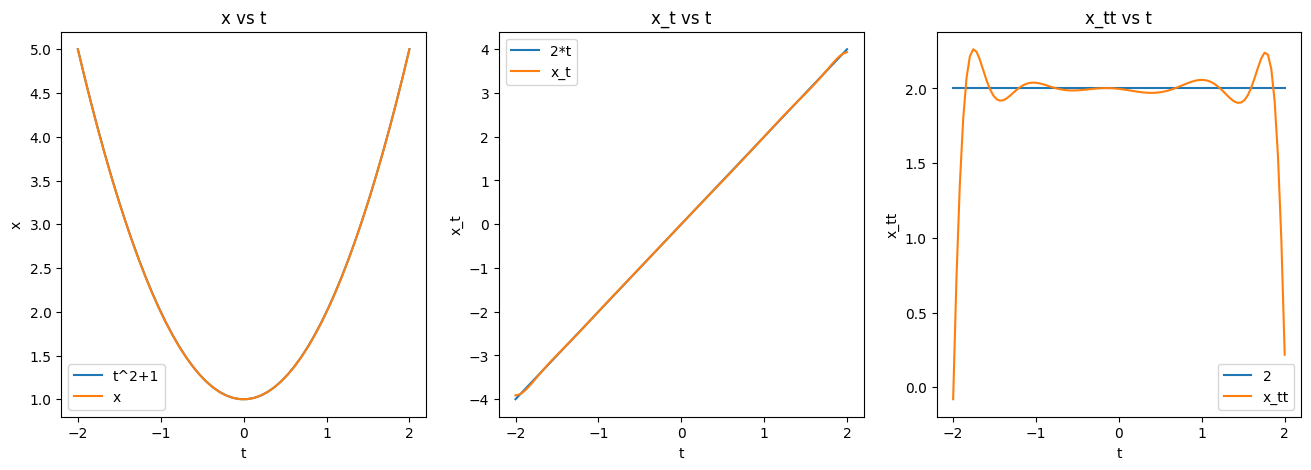

In [2]:
set_seeds(0)
ode1 = PDEModel("ode1", {"optimizer_type": OptimizerType.Adam})
ode1.set_state(["t"], {"t": [-2., 2.]})
ode1.add_endog("x", {"activation_type": ActivationType.Wavelet})
ode1.add_endog_equation(r"$\frac{\partial x}{\partial t} = 2 * t$", label="base_ode")
ode1.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="initial_condition")
print(ode1)
if not os.path.exists("./models/ode1_wavelet/ode1.pt"):
    ode1.train_model("./models/ode1_wavelet", "ode1.pt", True)
    ode1.eval_model(True)
else:
    ode1.load_model(torch.load("./models/ode1_wavelet/ode1.pt"))
    ode1.eval_model(True)
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
t = np.linspace(-2, 2)
ax[0].plot(t, t**2+1, label="t^2+1")
ax[1].plot(t, 2*t, label="2*t")
ax[2].plot(t, np.ones_like(t) * 2, label="2")
ode1.endog_vars["x"].plot("x", {"t": [-2, 2]}, ax=ax[0])
ode1.endog_vars["x"].plot("x_t", {"t": [-2, 2]}, ax=ax[1])
ode1.endog_vars["x"].plot("x_tt", {"t": [-2, 2]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

=============================Summary of Model ode1==============================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "Adam",
 "sampling_method": "RAR-G"
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
t: [-2.0, 2.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Wavelet()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Wavelet()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Wavelet()
    (linear_3): Linea

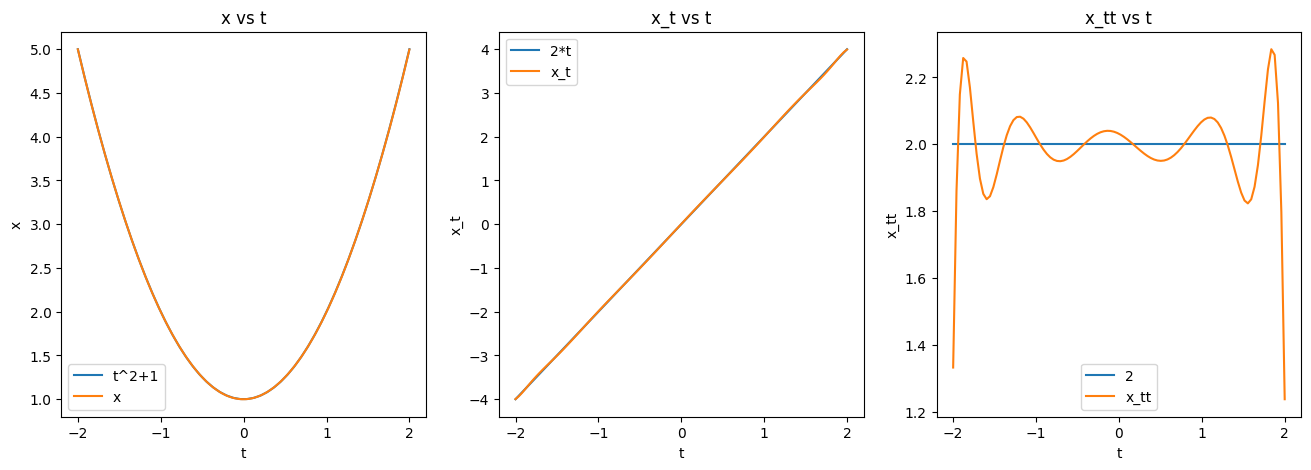

In [3]:
set_seeds(0)
ode1 = PDEModel("ode1", {"optimizer_type": OptimizerType.Adam, "sampling_method": SamplingMethod.RARG})
ode1.set_state(["t"], {"t": [-2., 2.]})
ode1.add_endog("x", {"activation_type": ActivationType.Wavelet})
ode1.add_endog_equation(r"$\frac{\partial x}{\partial t} = 2 * t$", label="base_ode")
ode1.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="initial_condition")
print(ode1)
if not os.path.exists("./models/ode1_wavelet/ode1_rarg.pt"):
    ode1.train_model("./models/ode1_wavelet", "ode1_rarg.pt", True)
    ode1.eval_model(True)
else:
    ode1.load_model(torch.load("./models/ode1_wavelet/ode1_rarg.pt"))
    ode1.eval_model(True)
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
t = np.linspace(-2, 2)
ax[0].plot(t, t**2+1, label="t^2+1")
ax[1].plot(t, 2*t, label="2*t")
ax[2].plot(t, np.ones_like(t) * 2, label="2")
ode1.endog_vars["x"].plot("x", {"t": [-2, 2]}, ax=ax[0])
ode1.endog_vars["x"].plot("x_t", {"t": [-2, 2]}, ax=ax[1])
ode1.endog_vars["x"].plot("x_tt", {"t": [-2, 2]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

=============================Summary of Model ode1==============================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "Adam",
 "sampling_method": "RAR-D"
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
t: [-2.0, 2.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Wavelet()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Wavelet()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Wavelet()
    (linear_3): Linea

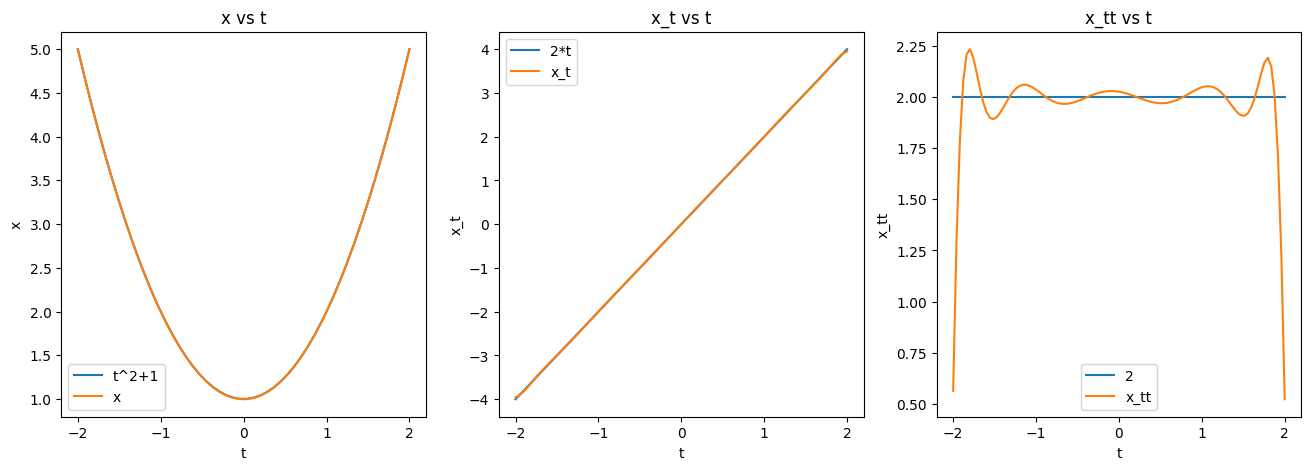

In [4]:
set_seeds(0)
ode1 = PDEModel("ode1", {"optimizer_type": OptimizerType.Adam, "sampling_method": SamplingMethod.RARD})
ode1.set_state(["t"], {"t": [-2., 2.]})
ode1.add_endog("x", {"activation_type": ActivationType.Wavelet})
ode1.add_endog_equation(r"$\frac{\partial x}{\partial t} = 2 * t$", label="base_ode")
ode1.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="initial_condition")
print(ode1)
if not os.path.exists("./models/ode1_wavelet/ode1_rard.pt"):
    ode1.train_model("./models/ode1_wavelet", "ode1_rard.pt", True)
    ode1.eval_model(True)
else:
    ode1.load_model(torch.load("./models/ode1_wavelet/ode1_rard.pt"))
    ode1.eval_model(True)
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
t = np.linspace(-2, 2)
ax[0].plot(t, t**2+1, label="t^2+1")
ax[1].plot(t, 2*t, label="2*t")
ax[2].plot(t, np.ones_like(t) * 2, label="2")
ode1.endog_vars["x"].plot("x", {"t": [-2, 2]}, ax=ax[0])
ode1.endog_vars["x"].plot("x_t", {"t": [-2, 2]}, ax=ax[1])
ode1.endog_vars["x"].plot("x_tt", {"t": [-2, 2]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

## High Order Regulation

=============================Summary of Model ode1==============================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "Adam",
 "sampling_method": "UniformRandom"
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
t: [-2.0, 2.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Wavelet()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Wavelet()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Wavelet()
    (linear_3

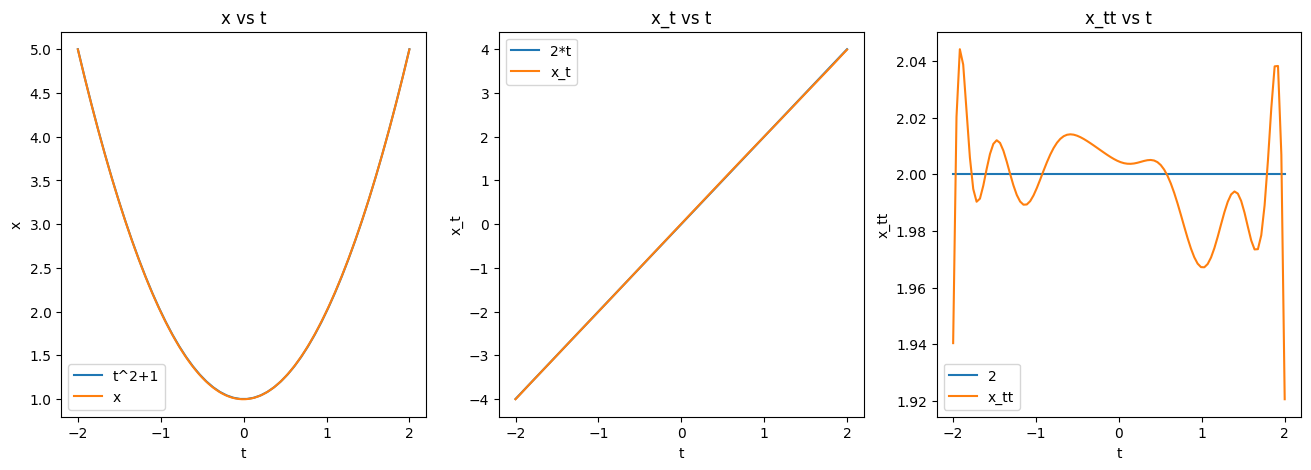

In [5]:
set_seeds(0)
ode1 = PDEModel("ode1", {"optimizer_type": OptimizerType.Adam})
ode1.set_state(["t"], {"t": [-2., 2.]})
ode1.add_endog("x", {"activation_type": ActivationType.Wavelet})
ode1.add_endog_equation(r"$\frac{\partial x}{\partial t} = 2 * t$", label="base_ode")
ode1.add_endog_equation(r"$\frac{\partial^2 x}{\partial t^2} = 2 $", label="high_order")
ode1.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="initial_condition")
print(ode1)
if not os.path.exists("./models/ode1_wavelet/ode1h.pt"):
    ode1.train_model("./models/ode1_wavelet", "ode1h.pt", True)
    ode1.eval_model(True)
else:
    ode1.load_model(torch.load("./models/ode1_wavelet/ode1h.pt"))
    ode1.eval_model(True)
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
t = np.linspace(-2, 2)
ax[0].plot(t, t**2+1, label="t^2+1")
ax[1].plot(t, 2*t, label="2*t")
ax[2].plot(t, np.ones_like(t) * 2, label="2")
ode1.endog_vars["x"].plot("x", {"t": [-2, 2]}, ax=ax[0])
ode1.endog_vars["x"].plot("x_t", {"t": [-2, 2]}, ax=ax[1])
ode1.endog_vars["x"].plot("x_tt", {"t": [-2, 2]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

=============================Summary of Model ode1==============================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "Adam",
 "sampling_method": "RAR-G"
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
t: [-2.0, 2.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Wavelet()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Wavelet()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Wavelet()
    (linear_3): Linea

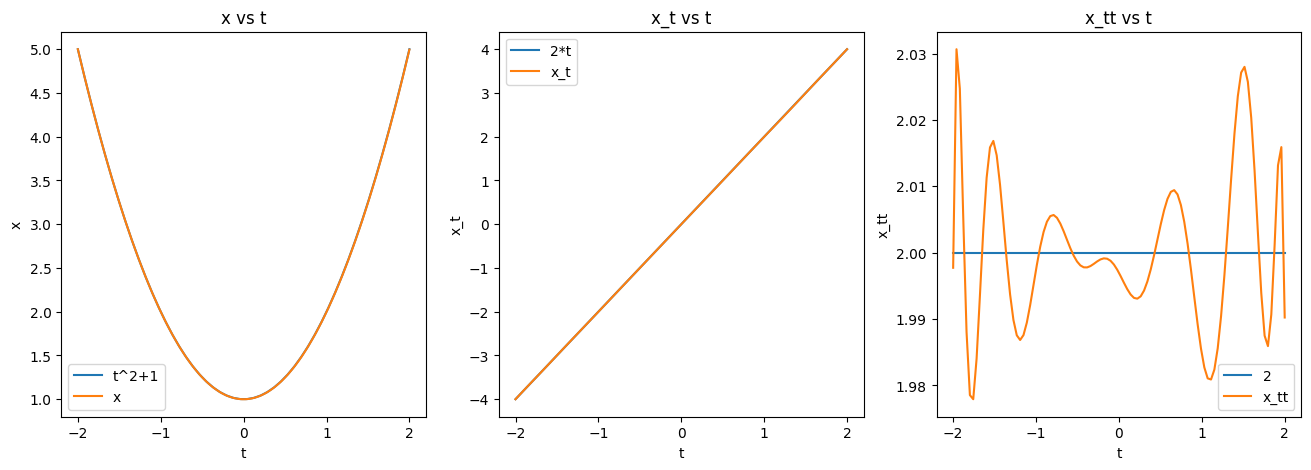

In [6]:
set_seeds(0)
ode1 = PDEModel("ode1", {"optimizer_type": OptimizerType.Adam, "sampling_method": SamplingMethod.RARG})
ode1.set_state(["t"], {"t": [-2., 2.]})
ode1.add_endog("x", {"activation_type": ActivationType.Wavelet})
ode1.add_endog_equation(r"$\frac{\partial x}{\partial t} = 2 * t$", label="base_ode")
ode1.add_endog_equation(r"$\frac{\partial^2 x}{\partial t^2} = 2 $", label="high_order")
ode1.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="initial_condition")
print(ode1)
if not os.path.exists("./models/ode1_wavelet/ode1h_rarg.pt"):
    ode1.train_model("./models/ode1_wavelet", "ode1h_rarg.pt", True)
    ode1.eval_model(True)
else:
    ode1.load_model(torch.load("./models/ode1_wavelet/ode1h_rarg.pt"))
    ode1.eval_model(True)
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
t = np.linspace(-2, 2)
ax[0].plot(t, t**2+1, label="t^2+1")
ax[1].plot(t, 2*t, label="2*t")
ax[2].plot(t, np.ones_like(t) * 2, label="2")
ode1.endog_vars["x"].plot("x", {"t": [-2, 2]}, ax=ax[0])
ode1.endog_vars["x"].plot("x_t", {"t": [-2, 2]}, ax=ax[1])
ode1.endog_vars["x"].plot("x_tt", {"t": [-2, 2]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

=============================Summary of Model ode1==============================
Config: {
 "batch_size": 100,
 "num_epochs": 1000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "Adam",
 "sampling_method": "RAR-D"
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
t: [-2.0, 2.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=30, bias=True)
    (activation_0): Wavelet()
    (linear_1): Linear(in_features=30, out_features=30, bias=True)
    (activation_1): Wavelet()
    (linear_2): Linear(in_features=30, out_features=30, bias=True)
    (activation_2): Wavelet()
    (linear_3): Linea

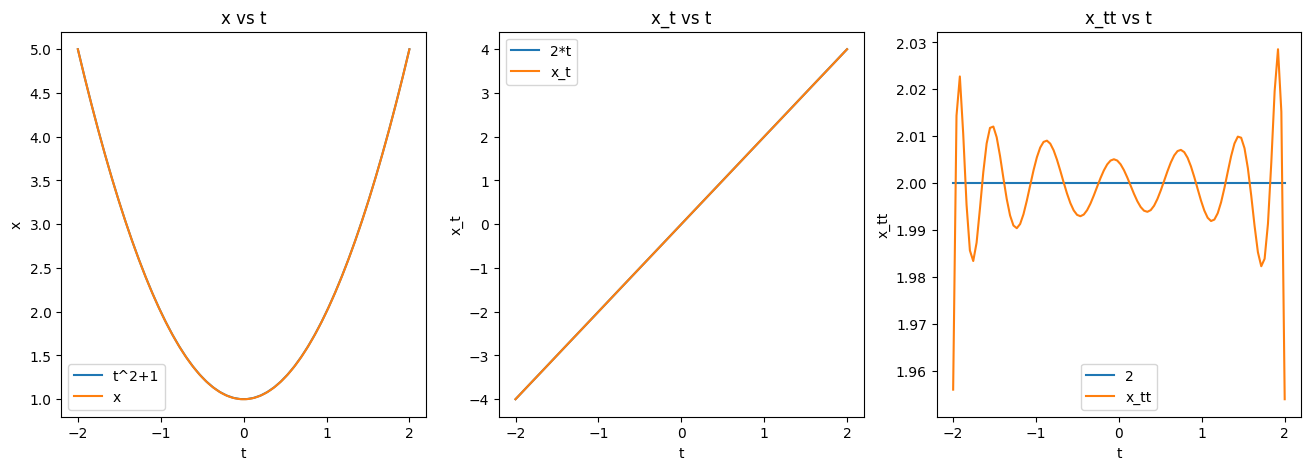

In [7]:
set_seeds(0)
ode1 = PDEModel("ode1", {"optimizer_type": OptimizerType.Adam, "sampling_method": SamplingMethod.RARD})
ode1.set_state(["t"], {"t": [-2., 2.]})
ode1.add_endog("x", {"activation_type": ActivationType.Wavelet})
ode1.add_endog_equation(r"$\frac{\partial x}{\partial t} = 2 * t$", label="base_ode")
ode1.add_endog_equation(r"$\frac{\partial^2 x}{\partial t^2} = 2 $", label="high_order")
ode1.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="initial_condition")
print(ode1)
if not os.path.exists("./models/ode1_wavelet/ode1h_rard.pt"):
    ode1.train_model("./models/ode1_wavelet", "ode1h_rard.pt", True)
    ode1.eval_model(True)
else:
    ode1.load_model(torch.load("./models/ode1_wavelet/ode1h_rard.pt"))
    ode1.eval_model(True)
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
t = np.linspace(-2, 2)
ax[0].plot(t, t**2+1, label="t^2+1")
ax[1].plot(t, 2*t, label="2*t")
ax[2].plot(t, np.ones_like(t) * 2, label="2")
ode1.endog_vars["x"].plot("x", {"t": [-2, 2]}, ax=ax[0])
ode1.endog_vars["x"].plot("x_t", {"t": [-2, 2]}, ax=ax[1])
ode1.endog_vars["x"].plot("x_tt", {"t": [-2, 2]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

## Function Approx

==================Summary of Model discontinuous_approximator===================
Config: {
 "batch_size": 100,
 "num_epochs": 30000,
 "lr": 0.001,
 "loss_log_interval": 100,
 "optimizer_type": "Adam",
 "sampling_method": "RAR-G",
 "refinement_interval": 200
}
Latex Variable Mapping:
{}
User Defined Parameters:
{}

================================State Variables=================================
x: [-3.0, 3.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: y
EndogVar(
  (model): Sequential(
    (linear_0): Linear(in_features=1, out_features=40, bias=True)
    (activation_0): Wavelet()
    (linear_1): Linear(in_features=40, out_features=40, bias=True)
    (activation_1): Wavelet()
    (final_layer): Linear(in_features=40, out_features=1, bias=True)
  )
)
Num parameter

Total loss: 0.9081: 100%|██████████| 30000/30000 [03:42<00:00, 135.03it/s]  


training finished, total time :: 222.16537714004517
Best model saved to ./models/discont_approx2/discont_approx2_rarg_best.pt if valid
Model saved to ./models/discont_approx2/discont_approx2_rarg.pt
Model loaded
===================================Evaluating===================================
loss :: system_neg_sys: 0.0003,
system_pos_sys: 0.0003,
total_loss: 0.0006


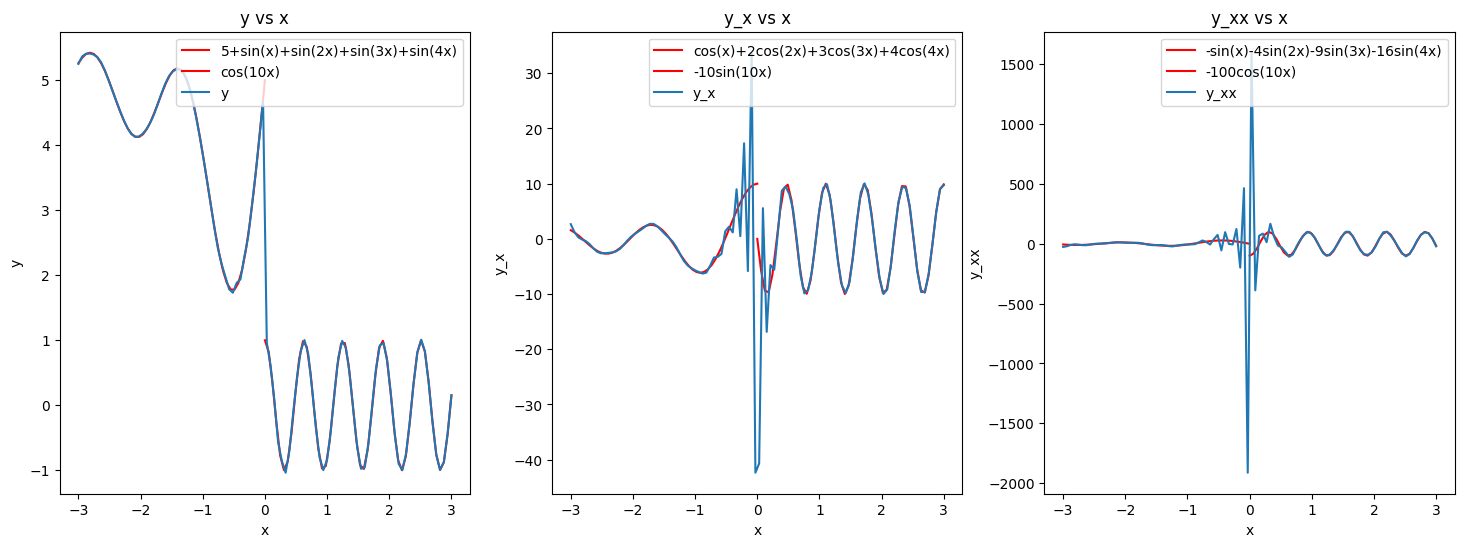

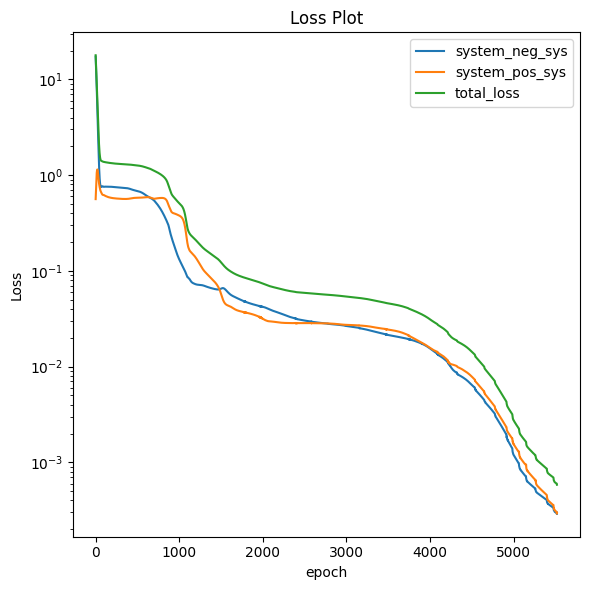

In [8]:
set_seeds(0)
discont_approx2 = PDEModel("discontinuous_approximator", 
                           {"num_epochs": 30000, "optimizer_type": OptimizerType.Adam,
                           "sampling_method": SamplingMethod.RARG, "refinement_interval": 200,
                           })
discont_approx2.set_state(["x"], {"x": [-3., 3.]})
discont_approx2.add_endog("y", {
    "hidden_units": [40, 40],
    "activation_type": ActivationType.Wavelet,
})
neg_sys = System([Constraint("x", Comparator.LT, "0", label="neg_const")], label="neg_sys")
neg_sys.add_endog_equation("y=5+sin(x)+sin(2*x)+sin(3*x)+sin(4*x)")
pos_sys = System([Constraint("x", Comparator.GEQ, "0", label="pos_const")], label="pos_sys")
pos_sys.add_endog_equation("y=cos(10*x)")
discont_approx2.add_system(neg_sys)
discont_approx2.add_system(pos_sys)
print(discont_approx2)
if not os.path.exists("./models/discont_approx2/discont_approx2_rarg.pt"):
    discont_approx2.train_model("./models/discont_approx2", "discont_approx2_rarg.pt", True)
    discont_approx2.load_model(torch.load("./models/discont_approx2/discont_approx2_rarg_best.pt"))
    discont_approx2.eval_model(True)
else:
    discont_approx2.load_model(torch.load("./models/discont_approx2/discont_approx2_rarg_best.pt"))
    discont_approx2.eval_model(True)

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
x = np.linspace(-3, 3)
x_neg = np.linspace(-3, 0)
x_pos = np.linspace(0, 3)
ax[0].plot(x_neg, 5+np.sin(x_neg)+np.sin(2*x_neg)+np.sin(3*x_neg)+np.sin(4*x_neg), label="5+sin(x)+sin(2x)+sin(3x)+sin(4x)", color="red")
ax[0].plot(x_pos, np.cos(10*x_pos), label="cos(10x)", color="red")
ax[1].plot(x_neg, np.cos(x_neg)+2*np.cos(2*x_neg)+3*np.cos(3*x_neg)+4*np.cos(4*x_neg), label="cos(x)+2cos(2x)+3cos(3x)+4cos(4x)", color="red")
ax[1].plot(x_pos, -10*np.sin(10*x_pos), label="-10sin(10x)", color="red")
ax[2].plot(x_neg, -np.sin(x_neg)-4*np.sin(2*x_neg)-9*np.sin(3*x_neg)-16*np.sin(4*x_neg), label="-sin(x)-4sin(2x)-9sin(3x)-16sin(4x)", color="red")
ax[2].plot(x_pos, -100*np.cos(10*x_pos), label="-100cos(10x)", color="red")
discont_approx2.endog_vars["y"].plot("y", {"x": [-3, 3]}, ax=ax[0])
discont_approx2.endog_vars["y"].plot("y_x", {"x": [-3, 3]}, ax=ax[1])
discont_approx2.endog_vars["y"].plot("y_xx", {"x": [-3, 3]}, ax=ax[2])
plt.subplots_adjust()
plt.show()
plot_loss_df(fn="./models/discont_approx2/discont_approx2_rarg_min_loss.csv", loss_plot_fn="./models/discont_approx2/discont_approx2_rarg_min_loss.png")